# Plots package tests

Grabbed some examples from https://docs.juliaplots.org/latest/#simple-is-beautiful-1

In [6]:
import Pkg; Pkg.add("Plots")

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


┌ Info: Saved animation to 
│   fn = /Users/jason/workspace/space-simulator/tmp.gif
└ @ Plots /Users/jason/.julia/packages/Plots/V8QVi/src/animation.jl:104


Plots.AnimatedGif("/Users/jason/workspace/space-simulator/tmp.gif")
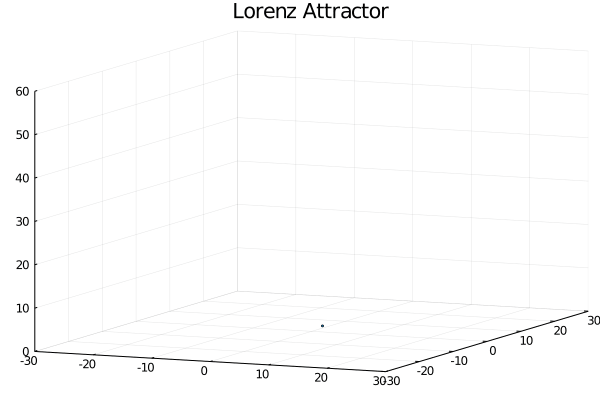

In [7]:
using Plots
# define the Lorenz attractor
Base.@kwdef mutable struct Lorenz
    dt::Float64 = 0.02
    σ::Float64 = 10
    ρ::Float64 = 28
    β::Float64 = 8/3
    x::Float64 = 1
    y::Float64 = 1
    z::Float64 = 1
end

function step!(l::Lorenz)
    dx = l.σ * (l.y - l.x);         l.x += l.dt * dx
    dy = l.x * (l.ρ - l.z) - l.y;   l.y += l.dt * dy
    dz = l.x * l.y - l.β * l.z;     l.z += l.dt * dz
end

attractor = Lorenz()


# initialize a 3D plot with 1 empty series
plt = plot3d(
    1,
    xlim = (-30, 30),
    ylim = (-30, 30),
    zlim = (0, 60),
    title = "Lorenz Attractor",
    marker = 2,
)

# build an animated gif by pushing new points to the plot, saving every 10th frame
@gif for i=1:1500
    step!(attractor)
    push!(plt, attractor.x, attractor.y, attractor.z)
end every 10

┌ Info: Saved animation to 
│   fn = /Users/jason/workspace/space-simulator/tmp.gif
└ @ Plots /Users/jason/.julia/packages/Plots/V8QVi/src/animation.jl:104


Plots.AnimatedGif("/Users/jason/workspace/space-simulator/tmp.gif")
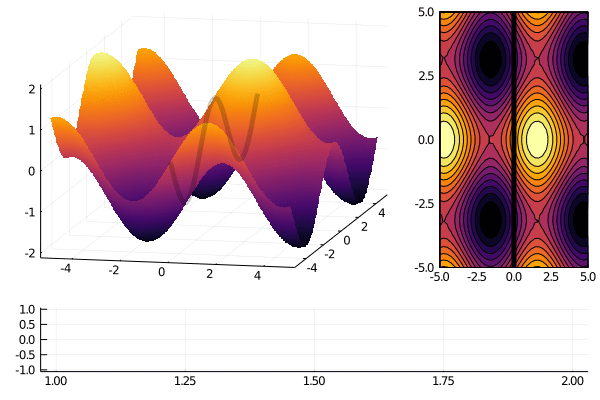

In [5]:
using Plots
default(legend = false)
x = y = range(-5, 5, length = 40)
zs = zeros(0, 40)
n = 100

@gif for i in range(0, stop = 2π, length = n)
    f(x, y) = sin(x + 10sin(i)) + cos(y)

    # create a plot with 3 subplots and a custom layout
    l = @layout [a{0.7w} b; c{0.2h}]
    p = plot(x, y, f, st = [:surface, :contourf], layout = l)

    # induce a slight oscillating camera angle sweep, in degrees (azimuth, altitude)
    plot!(p[1], camera = (10 * (1 + cos(i)), 40))

    # add a tracking line
    fixed_x = zeros(40)
    z = map(f, fixed_x, y)
    plot!(p[1], fixed_x, y, z, line = (:black, 5, 0.2))
    vline!(p[2], [0], line = (:black, 5))

    # add to and show the tracked values over time
    global zs = vcat(zs, z')
    plot!(p[3], zs, alpha = 0.2, palette = cgrad(:blues).colors)
end

┌ Info: Saved animation to 
│   fn = /Users/jason/workspace/space-simulator/tmp.gif
└ @ Plots /Users/jason/.julia/packages/Plots/V8QVi/src/animation.jl:104


Plots.AnimatedGif("/Users/jason/workspace/space-simulator/tmp.gif")
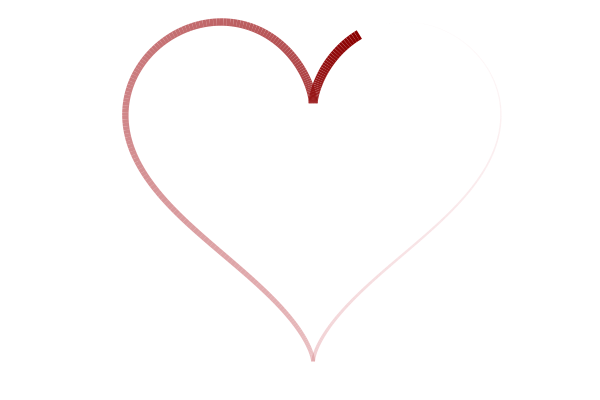

In [12]:
using Plots

@userplot CirclePlot
@recipe function f(cp::CirclePlot)
    x, y, i = cp.args
    n = length(x)
    inds = circshift(1:n, 1 - i)
    linewidth --> range(0, 10, length = n)
    seriesalpha --> range(0, 1, length = n)
    aspect_ratio --> 1
    label --> false
    x[inds], y[inds]
end

n = 400
t = range(0, 2π, length = n)
x = 16sin.(t).^3
y = 13cos.(t) .- 5cos.(2t) .- 2cos.(3t) .- cos.(4t)
@gif for i ∈ 1:n
    circleplot(x, y, i, line_z = 1:n, cbar = false, c = :reds, framestyle = :none)
end when i > 40 && mod1(i, 10) == 5